### Project aimed to explore England School charactersistic data, create visualisations and apply regression modelling

In [414]:
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import  sklearn
import numpy as np
import seaborn as sns
from matplotlib.patches import Rectangle

### Data Cleaning and Merging

In [99]:
#reading datasets
df1 = pd.read_csv('./england_ks4final.csv')
df2 = pd.read_csv('./england_census.csv')
df3 = pd.read_csv('./england_swf.csv')


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (53,55,57) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [100]:
df1

,RECTYPE,LEA,ESTAB,URN,SCHNAME,SCHNAME_AC,ADDRESS1,ADDRESS2,ADDRESS3,TOWN,...,TAVENT_GLO_PTQ_EE,TAVENT_GAV_PTQ_EE,TAVENT_GHI_PTQ_EE,TAVENT_GFSM6CLA1A_PTQ_EE,TAVENT_GNFSM6CLA1A_PTQ_EE,TAVENT_GFSM6CLA1A_17_PTQ_EE,TAVENT_GNFSM6CLA1A_17_PTQ_EE,TAVENT_GFSM6CLA1A_18_PTQ_EE,TAVENT_GNFSM6CLA1A_18_PTQ_EE,P8_BANDING
0,1,201.0,6005.0,100001.0,City of London School for Girls,NaN,St Giles' Terrace,Barbican,NaN,London,...,NP,NP,NP,NP,NP,NaN,NaN,NaN,NaN,NaN
1,1,201.0,6007.0,100003.0,City of London School,NaN,Queen Victoria Street,NaN,NaN,London,...,NP,NP,NP,NP,NP,NaN,NaN,NaN,NaN,NaN
2,4,201.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,202.0,4104.0,100049.0,Haverstock School,NaN,24 Haverstock Hill,Chalk Farm,NaN,London,...,4.8,6.1,7.1,5.9,6.7,7.5,7.7,7,7.3,3
4,1,202.0,4166.0,100050.0,Parliament Hill School,NaN,Highgate Road,NaN,NaN,London,...,5.9,7.6,8.9,7.7,8.8,9,9.3,8.5,8.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5668,2,938.0,7012.0,126163.0,"Fordwater School, Chichester",NaN,Summersdale Road,NaN,NaN,Chichester,...,SUPP,SUPP,SUPP,SUPP,SUPP,SUPP,SUPP,SUPP,SUPP,NaN
5669,2,938.0,7023.0,135814.0,Ingfield Manor School,NaN,Ingfield Manor Drive,Five Oaks,NaN,Billingshurst,...,NP,NP,NP,NP,NP,NaN,NaN,NaN,NaN,NaN
5670,4,938.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.4,7.4,8.5,6.5,7.8,7.8,9.1,8.3,9.7,2
5671,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
#selecting relevant variables
df1 = df1[['URN','ATT8SCR','P8MEA','P8MEAENG','P8MEAMAT','P8MEAEBAC','P8MEAOPEN','PTFSM6CLA1A_18','EGENDER']]
df2= df2[['URN','PNUMEAL','PNUMENGFL','PNUMUNCFL','PNORG','PNORB','NUMFSM']]
df3 = df3[['URN','Pupil:     Teacher Ratio','Mean Gross FTE Salary of All Teachers (£s)']]


In [104]:
df3.dropna(subset=['URN'], inplace=True)
df3 = df3.astype({"URN": int})
df3

,URN,Pupil: Teacher Ratio,Mean Gross FTE Salary of All Teachers (£s)
0,100000,15.0,"£45,421"
1,136807,18.7,"£37,371"
2,139837,16.5,"£43,589"
3,140686,22.3,"£43,096"
4,100008,19.1,"£47,681"
...,...,...,...
20184,138492,17.2,"£36,319"
20185,135744,16.9,"£39,812"
20186,135745,19,"£40,653"
20187,135760,18,"£42,693"


In [105]:

df1.dropna(subset=['URN'], inplace=True)
df1 = df1.astype({"URN": int})
df1

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,URN,ATT8SCR,P8MEA,P8MEAENG,P8MEAMAT,P8MEAEBAC,P8MEAOPEN,PTFSM6CLA1A_18,EGENDER
0,100001,57.9,NP,NP,NP,NP,NP,NP,GIRLS
1,100003,20,NP,NP,NP,NP,NP,NP,BOYS
3,100049,42.4,-0.11,-0.03,0.17,0,-0.47,61%,MIXED
4,100050,58.7,0.77,1.01,0.27,0.88,0.79,45%,GIRLS
5,100065,16.4,NP,NP,NP,NP,NP,NP,MIXED
...,...,...,...,...,...,...,...,...,...
5665,135930,7,NP,NP,NP,NP,NP,NP,MIXED
5666,135111,SUPP,NP,NP,NP,NP,NP,NP,MIXED
5667,126154,24.3,SUPP,SUPP,SUPP,SUPP,SUPP,NP,BOYS
5668,126163,SUPP,SUPP,SUPP,SUPP,SUPP,SUPP,20%,MIXED


In [106]:
df2 = df2[df2.URN.apply(lambda x: x.isnumeric())]
df2 = df2.astype({"URN": int})


In [133]:
merged = df1.merge(df2, on='URN')
x = merged.dropna()
x

,URN,ATT8SCR,P8MEA,P8MEAENG,P8MEAMAT,P8MEAEBAC,P8MEAOPEN,PTFSM6CLA1A_18,EGENDER,PNUMEAL,PNUMENGFL,PNUMUNCFL,PNORG,PNORB,NUMFSM
2,100049,42.4,-0.11,-0.03,0.17,0,-0.47,61%,MIXED,73.1,26.8,0.1,41.4,58.6,391.0
3,100050,58.7,0.77,1.01,0.27,0.88,0.79,45%,GIRLS,38.1,60.9,0.9,96.0,4.0,315.0
7,100054,63.4,0.73,1.12,0.19,0.85,0.58,32%,GIRLS,36.9,62.3,0.8,85.8,14.2,132.0
8,100056,46.3,-0.44,-0.49,-0.1,-0.14,-0.98,53%,BOYS,43.7,56.1,0.2,7.7,92.3,234.0
9,137181,50.3,0.1,0.41,-0.1,0.24,-0.11,53%,MIXED,49.7,40.7,9.6,47.8,52.2,366.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5158,136114,NE,NE,NE,NE,NE,NE,41%,MIXED,9.9,90.1,0.0,36.5,63.5,66.0
5159,126170,11.1,SUPP,SUPP,SUPP,SUPP,SUPP,79%,BOYS,3.4,96.6,0.0,0.0,100.0,27.0
5167,126154,24.3,SUPP,SUPP,SUPP,SUPP,SUPP,NP,BOYS,1.5,98.5,0.0,0.0,100.0,26.0
5168,126163,SUPP,SUPP,SUPP,SUPP,SUPP,SUPP,20%,MIXED,9.8,90.2,0.0,30.3,69.7,36.0


In [134]:
merged = x.merge(df3, on='URN')
xf = merged.dropna()
xf

,URN,ATT8SCR,P8MEA,P8MEAENG,P8MEAMAT,P8MEAEBAC,P8MEAOPEN,PTFSM6CLA1A_18,EGENDER,PNUMEAL,PNUMENGFL,PNUMUNCFL,PNORG,PNORB,NUMFSM,Pupil: Teacher Ratio,Mean Gross FTE Salary of All Teachers (£s)
0,100049,42.4,-0.11,-0.03,0.17,0,-0.47,61%,MIXED,73.1,26.8,0.1,41.4,58.6,391.0,13.7,"£49,446"
1,100050,58.7,0.77,1.01,0.27,0.88,0.79,45%,GIRLS,38.1,60.9,0.9,96.0,4.0,315.0,15.0,"£45,185"
2,100054,63.4,0.73,1.12,0.19,0.85,0.58,32%,GIRLS,36.9,62.3,0.8,85.8,14.2,132.0,16.1,"£49,134"
3,100056,46.3,-0.44,-0.49,-0.1,-0.14,-0.98,53%,BOYS,43.7,56.1,0.2,7.7,92.3,234.0,15.4,"£51,492"
4,137181,50.3,0.1,0.41,-0.1,0.24,-0.11,53%,MIXED,49.7,40.7,9.6,47.8,52.2,366.0,13.1,"£45,641"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,144243,55.6,0.57,0.59,0.14,0.74,0.68,11%,MIXED,8.6,90.9,0.5,49.3,50.7,50.0,17.8,"£38,209"
2925,135744,41.9,-0.41,-0.44,-0.12,-0.46,-0.54,31%,MIXED,3.4,96.6,0.0,43.3,56.7,137.0,16.9,"£39,812"
2926,135745,38.8,-0.49,-0.44,-0.25,-0.73,-0.55,28%,MIXED,10.1,89.9,0.0,51.0,49.0,194.0,19,"£40,653"
2927,135760,46.8,0.18,0.19,0.13,0.17,0.18,15%,MIXED,2.7,97.3,0.0,48.6,51.4,53.0,18,"£42,693"


In [135]:
xf['PTFSM6CLA1A_18'] = xf['PTFSM6CLA1A_18'].str.replace('%', '')
xf['Mean Gross FTE Salary of All Teachers (£s)'] = xf['Mean Gross FTE Salary of All Teachers (£s)'].str.replace('£', '')

xf

/var/folders/z9/3z2hn7yx20d993zq6c4s0d340000gn/T/ipykernel_3409/1853912840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xf['PTFSM6CLA1A_18'] = xf['PTFSM6CLA1A_18'].str.replace('%', '')
/var/folders/z9/3z2hn7yx20d993zq6c4s0d340000gn/T/ipykernel_3409/1853912840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xf['Mean Gross FTE Salary of All Teachers (£s)'] = xf['Mean Gross FTE Salary of All Teachers (£s)'].str.replace('£', '')


,URN,ATT8SCR,P8MEA,P8MEAENG,P8MEAMAT,P8MEAEBAC,P8MEAOPEN,PTFSM6CLA1A_18,EGENDER,PNUMEAL,PNUMENGFL,PNUMUNCFL,PNORG,PNORB,NUMFSM,Pupil: Teacher Ratio,Mean Gross FTE Salary of All Teachers (£s)
0,100049,42.4,-0.11,-0.03,0.17,0,-0.47,61,MIXED,73.1,26.8,0.1,41.4,58.6,391.0,13.7,"49,446"
1,100050,58.7,0.77,1.01,0.27,0.88,0.79,45,GIRLS,38.1,60.9,0.9,96.0,4.0,315.0,15.0,"45,185"
2,100054,63.4,0.73,1.12,0.19,0.85,0.58,32,GIRLS,36.9,62.3,0.8,85.8,14.2,132.0,16.1,"49,134"
3,100056,46.3,-0.44,-0.49,-0.1,-0.14,-0.98,53,BOYS,43.7,56.1,0.2,7.7,92.3,234.0,15.4,"51,492"
4,137181,50.3,0.1,0.41,-0.1,0.24,-0.11,53,MIXED,49.7,40.7,9.6,47.8,52.2,366.0,13.1,"45,641"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,144243,55.6,0.57,0.59,0.14,0.74,0.68,11,MIXED,8.6,90.9,0.5,49.3,50.7,50.0,17.8,"38,209"
2925,135744,41.9,-0.41,-0.44,-0.12,-0.46,-0.54,31,MIXED,3.4,96.6,0.0,43.3,56.7,137.0,16.9,"39,812"
2926,135745,38.8,-0.49,-0.44,-0.25,-0.73,-0.55,28,MIXED,10.1,89.9,0.0,51.0,49.0,194.0,19,"40,653"
2927,135760,46.8,0.18,0.19,0.13,0.17,0.18,15,MIXED,2.7,97.3,0.0,48.6,51.4,53.0,18,"42,693"


In [136]:
xf['Mean Gross FTE Salary of All Teachers (£s)'] = xf['Mean Gross FTE Salary of All Teachers (£s)'].str.replace(',', '')
xf

/var/folders/z9/3z2hn7yx20d993zq6c4s0d340000gn/T/ipykernel_3409/2038399817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xf['Mean Gross FTE Salary of All Teachers (£s)'] = xf['Mean Gross FTE Salary of All Teachers (£s)'].str.replace(',', '')


,URN,ATT8SCR,P8MEA,P8MEAENG,P8MEAMAT,P8MEAEBAC,P8MEAOPEN,PTFSM6CLA1A_18,EGENDER,PNUMEAL,PNUMENGFL,PNUMUNCFL,PNORG,PNORB,NUMFSM,Pupil: Teacher Ratio,Mean Gross FTE Salary of All Teachers (£s)
0,100049,42.4,-0.11,-0.03,0.17,0,-0.47,61,MIXED,73.1,26.8,0.1,41.4,58.6,391.0,13.7,49446
1,100050,58.7,0.77,1.01,0.27,0.88,0.79,45,GIRLS,38.1,60.9,0.9,96.0,4.0,315.0,15.0,45185
2,100054,63.4,0.73,1.12,0.19,0.85,0.58,32,GIRLS,36.9,62.3,0.8,85.8,14.2,132.0,16.1,49134
3,100056,46.3,-0.44,-0.49,-0.1,-0.14,-0.98,53,BOYS,43.7,56.1,0.2,7.7,92.3,234.0,15.4,51492
4,137181,50.3,0.1,0.41,-0.1,0.24,-0.11,53,MIXED,49.7,40.7,9.6,47.8,52.2,366.0,13.1,45641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,144243,55.6,0.57,0.59,0.14,0.74,0.68,11,MIXED,8.6,90.9,0.5,49.3,50.7,50.0,17.8,38209
2925,135744,41.9,-0.41,-0.44,-0.12,-0.46,-0.54,31,MIXED,3.4,96.6,0.0,43.3,56.7,137.0,16.9,39812
2926,135745,38.8,-0.49,-0.44,-0.25,-0.73,-0.55,28,MIXED,10.1,89.9,0.0,51.0,49.0,194.0,19,40653
2927,135760,46.8,0.18,0.19,0.13,0.17,0.18,15,MIXED,2.7,97.3,0.0,48.6,51.4,53.0,18,42693


In [141]:
xf.describe()


,URN,ATT8SCR,P8MEA,P8MEAENG,P8MEAMAT,P8MEAEBAC,P8MEAOPEN,PTFSM6CLA1A_18,PNUMEAL,PNUMENGFL,PNUMUNCFL,PNORG,PNORB,NUMFSM,PTRatio,Salary
count,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000
mean,132170.146358,47.476631,0.001571,-0.005661,-0.006631,-0.005133,-0.006241,27.370728,16.240145,83.354712,0.405454,49.679082,50.320987,142.084570,16.345426,40576.816707
std,12343.326274,8.954741,0.466184,0.514868,0.439383,0.560572,0.565277,15.736498,19.219566,19.439950,1.872454,17.438963,17.438964,100.731226,2.404415,2953.289193
min,100049.000000,17.200000,-2.410000,-2.460000,-2.210000,-2.890000,-2.750000,0.000000,0.000000,3.600000,0.000000,0.000000,0.000000,1.000000,4.800000,23772.000000
25%,132268.000000,41.900000,-0.290000,-0.330000,-0.290000,-0.360000,-0.360000,15.000000,3.100000,77.200000,0.000000,47.000000,48.900000,70.000000,15.100000,38874.000000
50%,137075.000000,46.500000,-0.010000,-0.020000,-0.010000,0.000000,-0.010000,24.000000,7.900000,91.800000,0.000000,49.100000,50.900000,118.000000,16.300000,40405.000000
75%,139138.000000,51.800000,0.300000,0.320000,0.260000,0.350000,0.340000,37.000000,22.000000,96.700000,0.300000,51.100000,53.000000,192.000000,17.600000,41918.000000
max,146237.000000,85.200000,2.160000,2.370000,1.970000,2.150000,2.960000,91.000000,96.400000,100.000000,75.300000,100.000000,100.000000,919.000000,49.500000,55825.000000


### Visualisation

<AxesSubplot:>

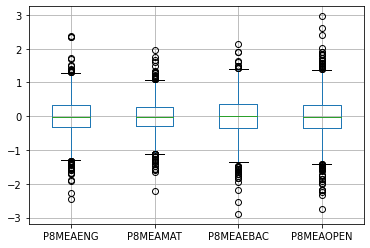

In [315]:
#boxplots of scores
xf[['P8MEAENG','P8MEAMAT','P8MEAEBAC','P8MEAOPEN']].boxplot()

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in a

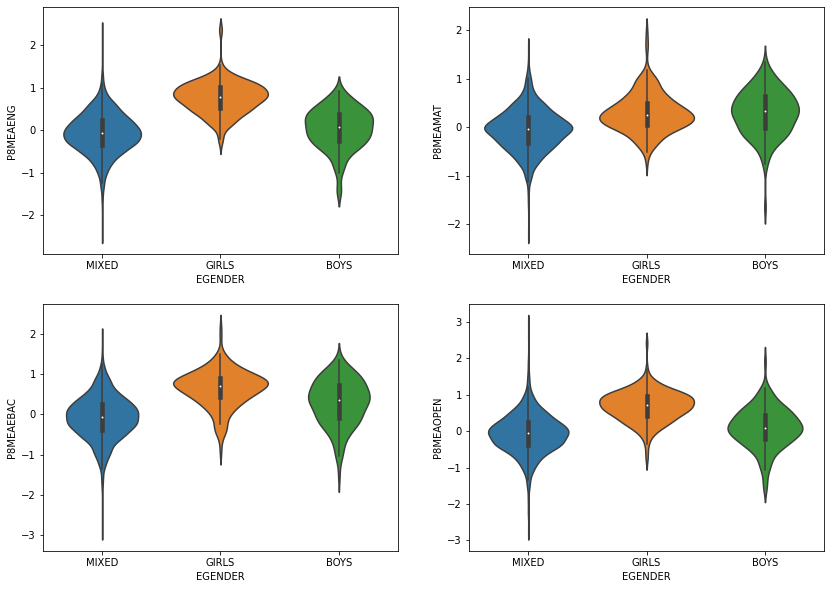

In [335]:
#violinplots of scores

fig = plt.figure(figsize =(14,10))
ax1 = plt.subplot(221)

ax1 = sns.violinplot(xf['EGENDER'],xf['P8MEAENG'])
ax1 = plt.subplot(222)

ax1 = sns.violinplot(xf['EGENDER'],xf['P8MEAMAT'])
ax1 = plt.subplot(223)

ax1 = sns.violinplot(xf['EGENDER'],xf['P8MEAEBAC'])
ax1 = plt.subplot(224)

ax = sns.violinplot(xf['EGENDER'],xf['P8MEAOPEN'])

<AxesSubplot:>

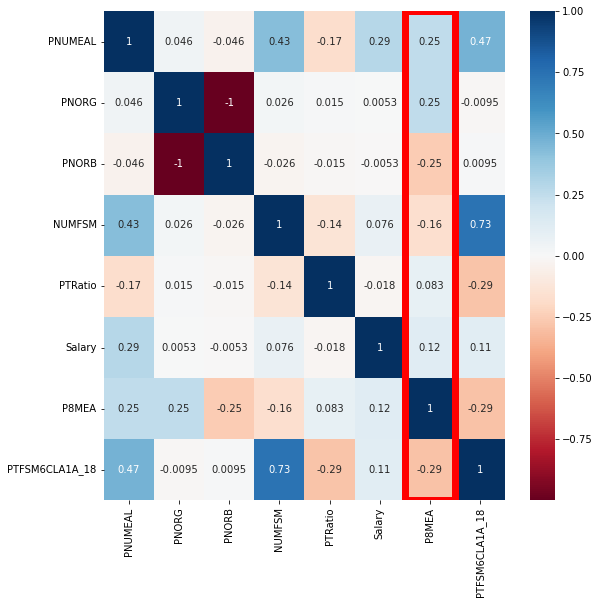

In [165]:
#correlations matrix

f, ax = plt.subplots(figsize=(9, 9))
ax = sns.heatmap(c,cmap="RdBu", annot=True,ax=ax)
ax.add_patch(Rectangle((6,0),1,8, fill=False, edgecolor='red', lw=7))


ax

In [138]:
xf = xf.rename(columns={'Pupil:     Teacher Ratio': 'PTRatio', 'Mean Gross FTE Salary of All Teachers (£s)': 'Salary'})

In [139]:
values = ['SUPP', 'NE', 'NP', 'LOWCOV']

#drop rows that contain any value in the list
xf = xf[xf.ATT8SCR.isin(values) == False]
xf = xf[xf.P8MEA.isin(values) == False]
xf = xf[xf.P8MEAENG.isin(values) == False]
xf = xf[xf.P8MEAMAT.isin(values) == False]
xf = xf[xf.P8MEAEBAC.isin(values) == False]
xf = xf[xf.P8MEAOPEN.isin(values) == False]
xf = xf[xf.PTFSM6CLA1A_18.isin(values) == False]
xf = xf[xf.PNORG.isin(values) == False]
xf = xf[xf.PNORB.isin(values) == False]
xf = xf[xf.PTRatio.isin(values) == False]
xf = xf[xf.Salary.isin(values) == False]
xf = xf[xf.NUMFSM.isin(values) == False]




In [140]:
xf = xf.astype({'PTRatio': float,'Salary': float,"ATT8SCR": float,"P8MEA": float,"P8MEAENG": float,"P8MEAMAT": float,"P8MEAEBAC": float,"P8MEAOPEN": float,"PTFSM6CLA1A_18": float})
jj = xf[['PNUMEAL','PNORG','PNORB','NUMFSM','PTRatio','Salary','P8MEA','PTFSM6CLA1A_18']]

In [131]:
jj.corr()

,PNUMEAL,PNORG,PNORB,NUMFSM,PTRatio,Salary,P8MEA,PTFSM6CLA1A_18
PNUMEAL,1.000000,0.046243,-0.046246,0.428876,-0.172114,0.286435,0.252626,0.471616
PNORG,0.046243,1.000000,-1.000000,0.026011,0.015243,0.005253,0.254988,-0.009509
PNORB,-0.046246,-1.000000,1.000000,-0.026012,-0.015241,-0.005255,-0.254993,0.009511
NUMFSM,0.428876,0.026011,-0.026012,1.000000,-0.140270,0.076215,-0.164443,0.734852
PTRatio,-0.172114,0.015243,-0.015241,-0.140270,1.000000,-0.018046,0.083461,-0.285703
Salary,0.286435,0.005253,-0.005255,0.076215,-0.018046,1.000000,0.122232,0.110020
P8MEA,0.252626,0.254988,-0.254993,-0.164443,0.083461,0.122232,1.000000,-0.292548
PTFSM6CLA1A_18,0.471616,-0.009509,0.009511,0.734852,-0.285703,0.110020,-0.292548,1.000000


In [408]:
xx.describe()

,PNUMEAL,PNORG,PNORB,NUMFSM,PTRatio,Salary,PTFSM6CLA1A_18,PNUMENGFL
count,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000
mean,16.240145,49.679082,50.320987,142.084570,16.345426,40576.816707,27.370728,83.354712
std,19.219566,17.438963,17.438964,100.731226,2.404415,2953.289193,15.736498,19.439950
min,0.000000,0.000000,0.000000,1.000000,4.800000,23772.000000,0.000000,3.600000
25%,3.100000,47.000000,48.900000,70.000000,15.100000,38874.000000,15.000000,77.200000
50%,7.900000,49.100000,50.900000,118.000000,16.300000,40405.000000,24.000000,91.800000
75%,22.000000,51.100000,53.000000,192.000000,17.600000,41918.000000,37.000000,96.700000
max,96.400000,100.000000,100.000000,919.000000,49.500000,55825.000000,91.000000,100.000000


array([[<AxesSubplot:xlabel='PNUMEAL', ylabel='PNUMEAL'>,
        <AxesSubplot:xlabel='NUMFSM', ylabel='PNUMEAL'>,
        <AxesSubplot:xlabel='PTRatio', ylabel='PNUMEAL'>,
        <AxesSubplot:xlabel='Salary', ylabel='PNUMEAL'>],
       [<AxesSubplot:xlabel='PNUMEAL', ylabel='NUMFSM'>,
        <AxesSubplot:xlabel='NUMFSM', ylabel='NUMFSM'>,
        <AxesSubplot:xlabel='PTRatio', ylabel='NUMFSM'>,
        <AxesSubplot:xlabel='Salary', ylabel='NUMFSM'>],
       [<AxesSubplot:xlabel='PNUMEAL', ylabel='PTRatio'>,
        <AxesSubplot:xlabel='NUMFSM', ylabel='PTRatio'>,
        <AxesSubplot:xlabel='PTRatio', ylabel='PTRatio'>,
        <AxesSubplot:xlabel='Salary', ylabel='PTRatio'>],
       [<AxesSubplot:xlabel='PNUMEAL', ylabel='Salary'>,
        <AxesSubplot:xlabel='NUMFSM', ylabel='Salary'>,
        <AxesSubplot:xlabel='PTRatio', ylabel='Salary'>,
        <AxesSubplot:xlabel='Salary', ylabel='Salary'>]], dtype=object)

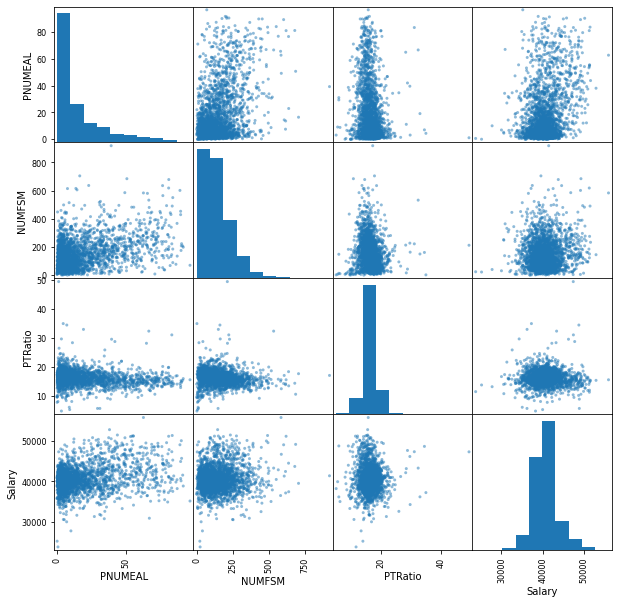

In [146]:
scatter_matrix(jj[['PNUMEAL','NUMFSM','PTRatio','Salary']],figsize=(10,10))

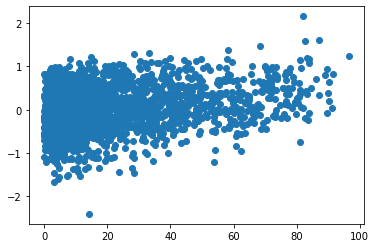

In [202]:
plt.scatter(jj['PNUMEAL'],jj['P8MEA'])

### Regression

In [360]:

lin_reg=LinearRegression()
X = xf['PNUMENGFL'].values.reshape(-1, 1)  # values converts it into a numpy array
Y = xf['P8MEA'].values.reshape(-1, 1)
Z = xf['Salary'].values.reshape(-1, 1)
D = xf['P8MEAEBAC'].values.reshape(-1, 1)
E = xf['P8MEAOPEN'].values.reshape(-1, 1)

lin_reg.fit(X,Y)

Y_pred = lin_reg.predict(X)



Text(0.5, 0, 'Progress 8 vs % of pupil at a disadvantage')

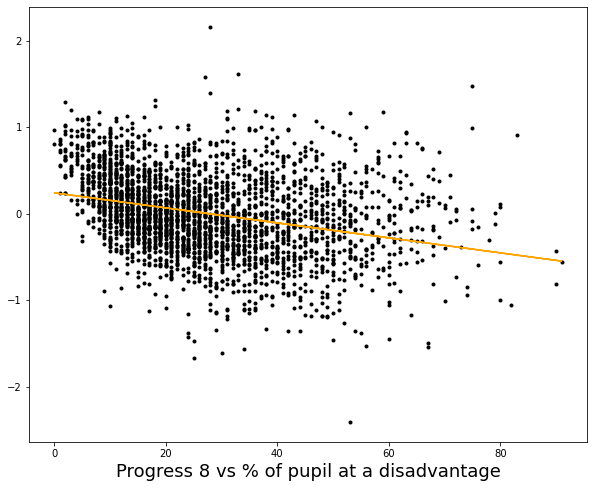

In [361]:
fig = plt.figure(figsize =(10, 8))


plt.scatter(X,Y,c='black',marker='.')
plt.plot(X,Y_pred, color='orange')


plt.xlabel('Progress 8 vs % of pupil at a disadvantage', fontsize=18)


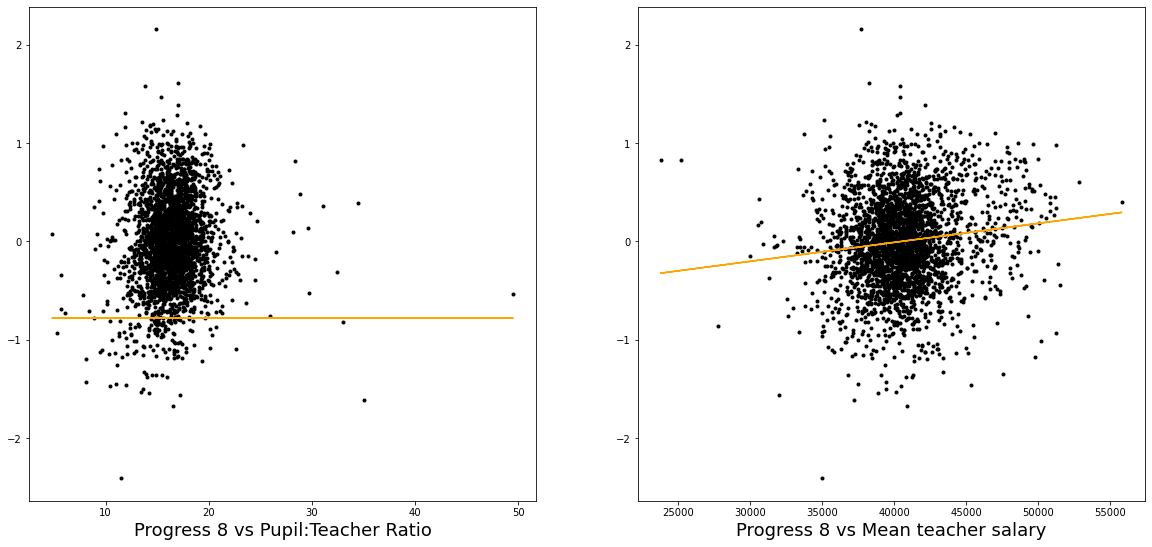

In [337]:
fig = plt.figure(figsize =(20, 20))

ax1 = plt.subplot(221)
ax1 = plt.scatter(X,Y,c='black',marker='.')
plt.plot(X,Y_pred, color='orange')
plt.xlabel('Progress 8 vs Pupil:Teacher Ratio', fontsize=18)


ax1 = plt.subplot(222)
ax1 = plt.scatter(Z,Y,c='black',marker='.')
plt.plot(Z,Y2_pred, color='orange')
plt.xlabel('Progress 8 vs Mean teacher salary', fontsize=18)

plt.show()

In [ ]:
ax1 = plt.scatter(Z,Y,c='black',marker='.')
plt.plot(Z,Y2_pred, color='orange')
plt.xlabel('Progress 8 vs Mean teacher salary')

In [87]:
X1 = x['PNUMENGFL'].values.reshape(-1, 1)  # values converts it into a numpy array
Y1 = x['P8MEA'].values.reshape(-1, 1)
lin_reg.fit(X1, Y1)
Y1_pred = lin_reg.predict(X1)

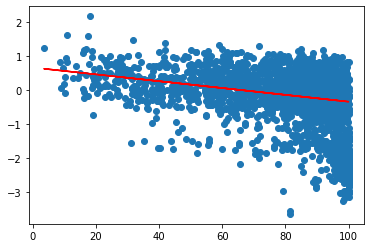

In [88]:
plt.scatter(X1,Y1)
plt.plot(X1,Y1_pred,color='red')
plt.show()

In [89]:
y = x.copy()
y = y.drop('URN',axis=1)

In [90]:
x.head()

,URN,ATT8SCR,P8MEA,P8MEAENG,P8MEAMAT,P8MEAEBAC,P8MEAOPEN,PTFSM6CLA1A_18,EGENDER,PNUMEAL,PNUMENGFL,PNUMUNCFL,PNORG,PNORB,NUMFSM
2,100049,42.4,-0.11,-0.03,0.17,0.00,-0.47,61.0,MIXED,73.1,26.8,0.1,41.4,58.6,391.0
3,100050,58.7,0.77,1.01,0.27,0.88,0.79,45.0,GIRLS,38.1,60.9,0.9,96.0,4.0,315.0
7,100054,63.4,0.73,1.12,0.19,0.85,0.58,32.0,GIRLS,36.9,62.3,0.8,85.8,14.2,132.0
8,100056,46.3,-0.44,-0.49,-0.10,-0.14,-0.98,53.0,BOYS,43.7,56.1,0.2,7.7,92.3,234.0
9,137181,50.3,0.10,0.41,-0.10,0.24,-0.11,53.0,MIXED,49.7,40.7,9.6,47.8,52.2,366.0


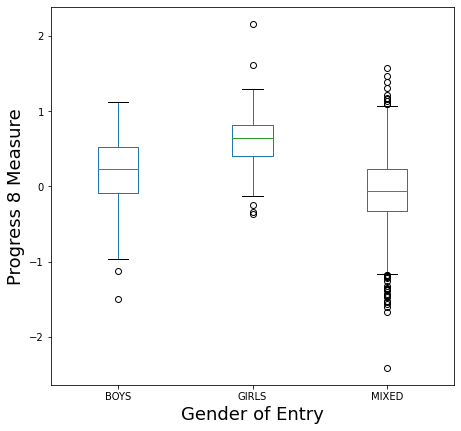

In [336]:
ax = xf.boxplot(by ='EGENDER', column =['P8MEA'], grid = False, figsize=(7,7));

plt.suptitle('')

ax.set_title('');
ax.set_xlabel("Gender of Entry", fontsize=18)
ax.set_ylabel("Progress 8 Measure", fontsize=18)
ax = plt.show()

In [ ]:
xf.boxplot(by ='EGENDER', column =['P8MEA'], grid = False, figsize=(10,5))


In [362]:

lin_reg=LinearRegression()
X = xf[['PNUMENGFL','PTRatio','Salary',	'PNORG' ,'NUMFSM', 'PTFSM6CLA1A_18']]
Y = xf['P8MEA'].values.reshape(-1, 1)
lin_reg.fit(X, Y)
Y_pred = lin_reg.predict(X)




In [430]:
import statsmodels.api as sm


In [431]:
X = xf[['PNUMENGFL','PTRatio','Salary',	'PNORG' ,'NUMFSM', 'PTFSM6CLA1A_18']]
y = xf['P8MEA']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  P8MEA   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     243.9
Date:                Thu, 28 Apr 2022   Prob (F-statistic):          9.15e-253
Time:                        13:26:44   Log-Likelihood:                -1305.8
No. Observations:                2897   AIC:                             2626.
Df Residuals:                    2890   BIC:                             2667.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.7472      0.131      5.

(array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

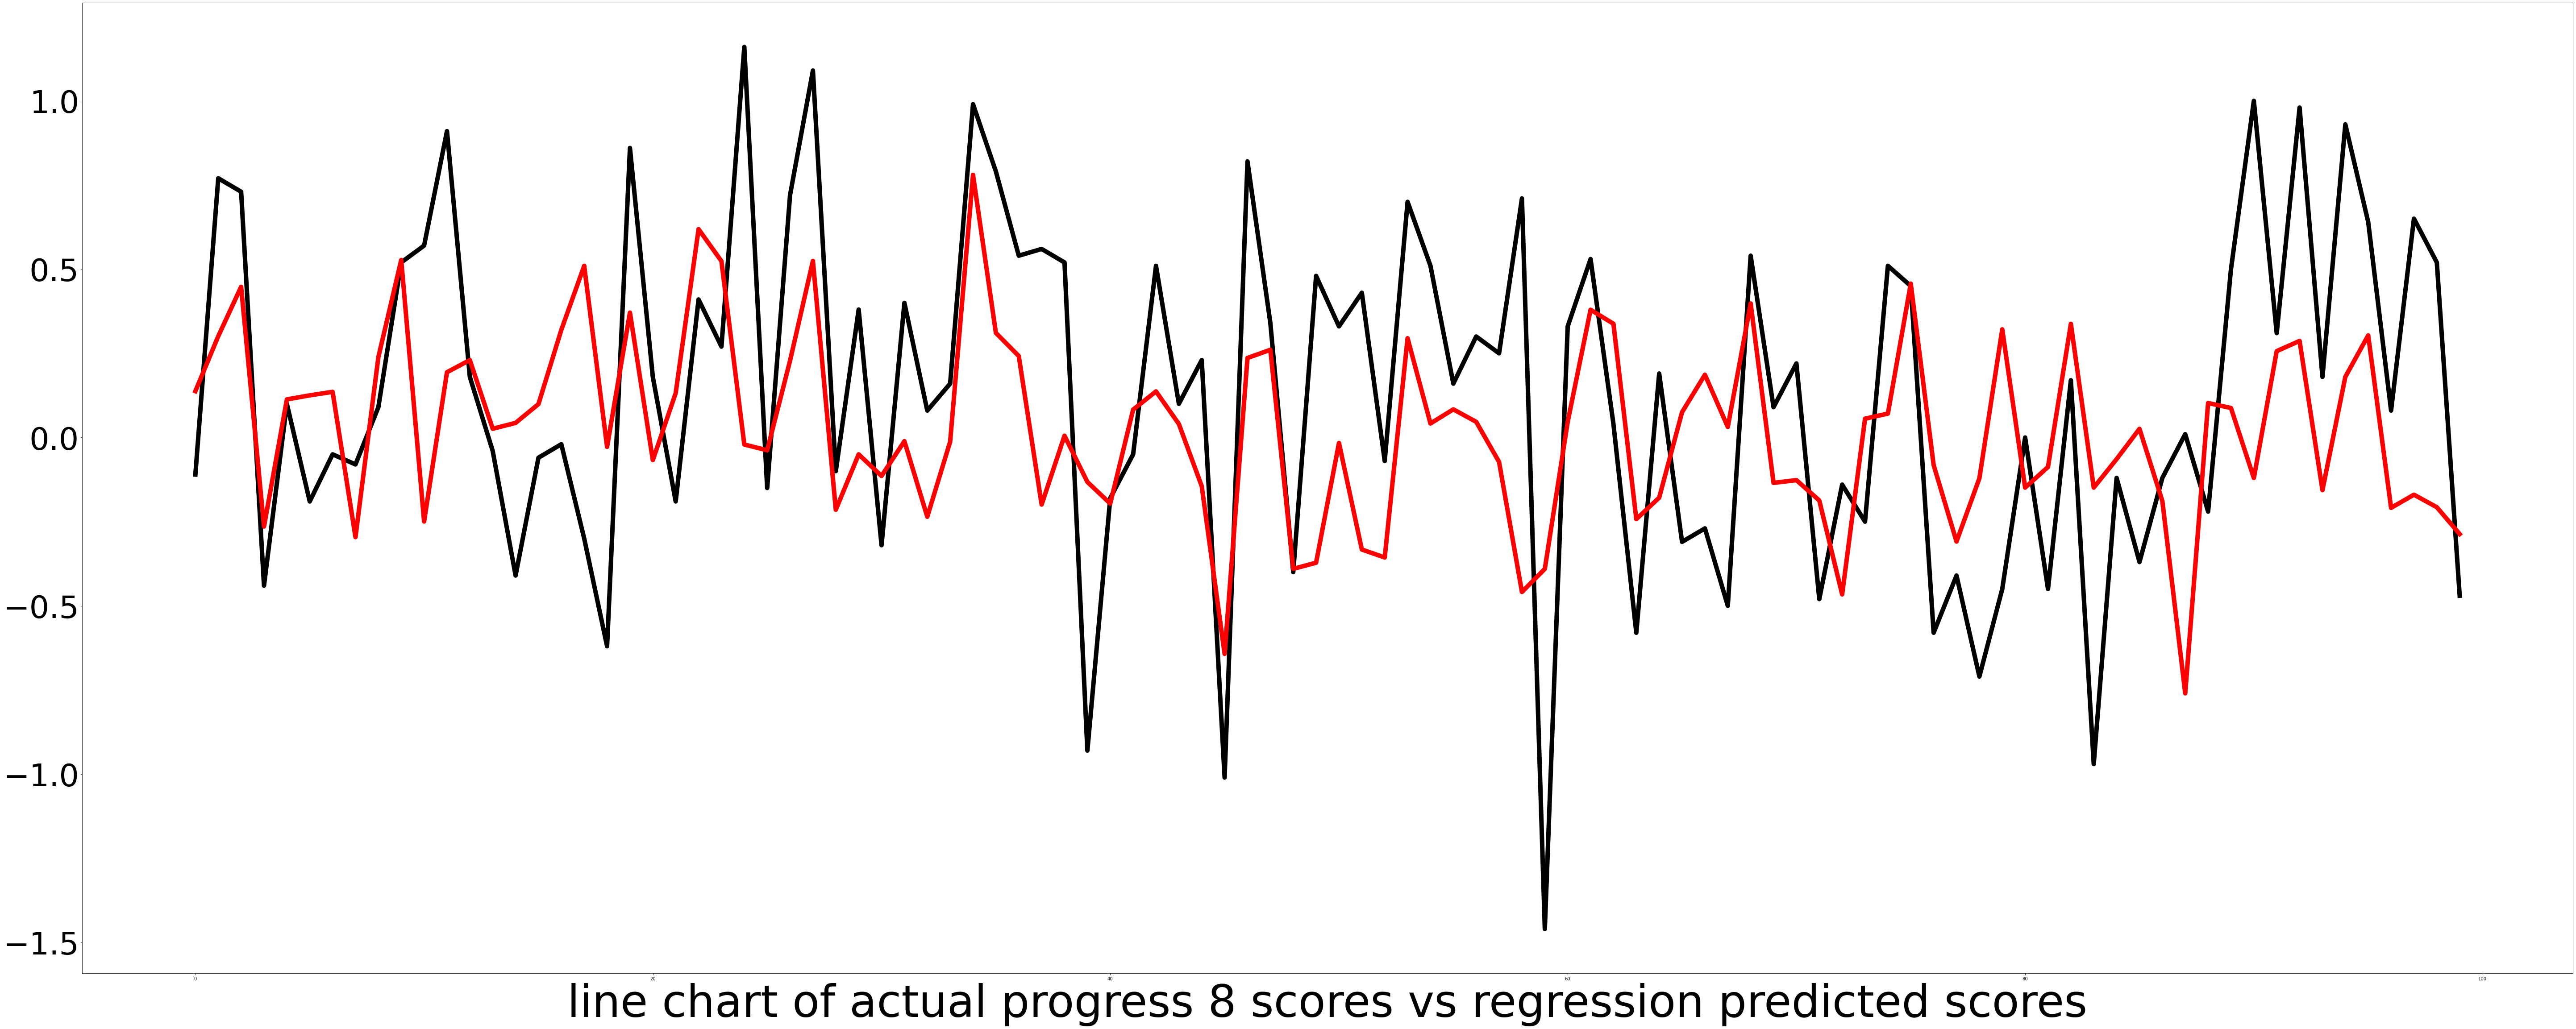

In [398]:
fig = plt.figure(figsize =(100, 40))
plt.plot(Y[0:100],c='black',lw=10)
plt.plot(Y_pred[0:100],c='red',lw=10)
plt.xlabel('line chart of actual progress 8 scores vs regression predicted scores', fontsize=100)
plt.yticks(fontsize=70)




In [363]:

X = xf[['PNUMENGFL',         'PTRatio','        Salary',	'PNORG'	,	'       NUMFSM'	,	'PTFSM6CLA1A_18']]
array([[-1.14090683e-02,  2.85478484e-03,  6.72132572e-06, 6.10100220e-03,  2.47822884e-05, -1.53695764e-02]])
lin_reg.coef_


array([[-1.14090683e-02,  2.85478484e-03,  6.72132572e-06,
         6.10100220e-03,  2.47822884e-05, -1.53695764e-02]])

In [ ]:
PTFSM6CLA1A_18, PNUMENGFL, PNORG , PTRatio, NUMFSM, Salary